In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import normaltest

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder
from sklearn.compose import ColumnTransformer

In [2]:
df = pd.read_csv("../input/vehicle-dataset-from-cardekho/Car details v3.csv")
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [3]:
df[df.owner=='Test Drive Car'].head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
4383,Volkswagen Vento 1.5 TDI Highline BSIV,2019,1350000,5400,Diesel,Dealer,Manual,Test Drive Car,22.27 kmpl,1498 CC,108.6 bhp,250Nm@ 1500-3000rpm,5.0
4950,Audi A6 35 TFSI Matrix,2019,6223000,7800,Petrol,Dealer,Automatic,Test Drive Car,15.26 kmpl,1798 CC,187.74 bhp,320Nm@ 1400-4100rpm,5.0
4951,Audi A6 35 TFSI Matrix,2019,5923000,11500,Petrol,Dealer,Automatic,Test Drive Car,15.26 kmpl,1798 CC,187.74 bhp,320Nm@ 1400-4100rpm,5.0
4952,Audi A6 35 TFSI Matrix,2019,6523000,23600,Petrol,Dealer,Automatic,Test Drive Car,15.26 kmpl,1798 CC,187.74 bhp,320Nm@ 1400-4100rpm,5.0
6220,Honda Civic ZX,2019,2000000,24857,Petrol,Dealer,Automatic,Test Drive Car,16.5 kmpl,1799 CC,139.46 bhp,174Nm@ 4300rpm,5.0


In [4]:
df.dropna(axis=0,inplace=True)
df['current_year'] = 2021

In [5]:
df['No of years'] = df['current_year']-df['year']
df.drop(['current_year','year'],axis=1,inplace=True)
df.head()

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,No of years
0,Maruti Swift Dzire VDI,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,7
1,Skoda Rapid 1.5 TDI Ambition,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,7
2,Honda City 2017-2020 EXi,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,15
3,Hyundai i20 Sportz Diesel,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,11
4,Maruti Swift VXI BSIII,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,14


In [6]:
# Handling mileage col
df['mileage'] = df['mileage'].str.split(expand=True)[0]
df['mileage'] = df['mileage'].astype('float64')

In [7]:
# Handling engine col
df['engine'] = df['engine'].str.split(expand=True)[0]
df['engine'] = df['engine'].astype('int32')

In [8]:
# Handling max_power col
df['max_power'] = df['max_power'].str.split(expand=True)[0]
df['max_power'] = df['max_power'].astype('float64')

In [9]:
# Handling selling_price
df['selling_price'] = df['selling_price'] / 10000

In [10]:
df['seats'] = df['seats'].astype('int32')
df.head()

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,No of years
0,Maruti Swift Dzire VDI,45.0,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,190Nm@ 2000rpm,5,7
1,Skoda Rapid 1.5 TDI Ambition,37.0,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,250Nm@ 1500-2500rpm,5,7
2,Honda City 2017-2020 EXi,15.8,140000,Petrol,Individual,Manual,Third Owner,17.70,1497,78.00,"12.7@ 2,700(kgm@ rpm)",5,15
3,Hyundai i20 Sportz Diesel,22.5,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,22.4 kgm at 1750-2750rpm,5,11
4,Maruti Swift VXI BSIII,13.0,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,"11.5@ 4,500(kgm@ rpm)",5,14


# Handling name column

In [11]:
df['Brand'] = df['name'].str.split(expand=True)[0]
df.drop(columns=['name'],inplace=True)
df.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,No of years,Brand
0,45.0,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,190Nm@ 2000rpm,5,7,Maruti
1,37.0,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,250Nm@ 1500-2500rpm,5,7,Skoda
2,15.8,140000,Petrol,Individual,Manual,Third Owner,17.70,1497,78.00,"12.7@ 2,700(kgm@ rpm)",5,15,Honda
3,22.5,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,22.4 kgm at 1750-2750rpm,5,11,Hyundai
4,13.0,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,"11.5@ 4,500(kgm@ rpm)",5,14,Maruti


In [12]:
df['Brand'].unique()

array(['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
       'Mahindra', 'Tata', 'Chevrolet', 'Datsun', 'Jeep', 'Mercedes-Benz',
       'Mitsubishi', 'Audi', 'Volkswagen', 'BMW', 'Nissan', 'Lexus',
       'Jaguar', 'Land', 'MG', 'Volvo', 'Daewoo', 'Kia', 'Fiat', 'Force',
       'Ambassador', 'Ashok', 'Isuzu', 'Opel'], dtype=object)

In [13]:
df.drop(['torque'],axis=1,inplace=True)

# Analysis of Categorical Data

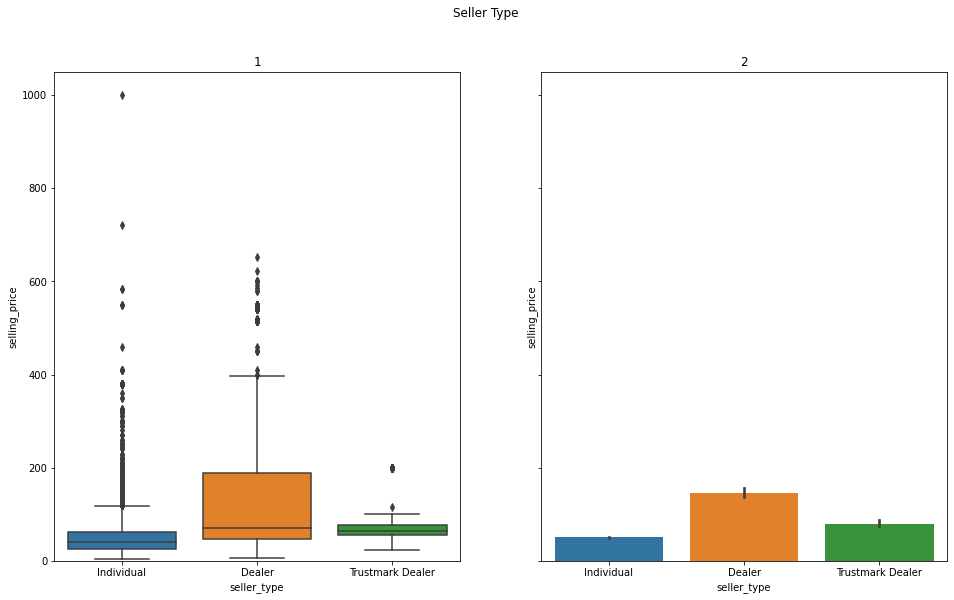

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(16, 9), sharey=True)
fig.suptitle('Seller Type')

# Bulbasaur
sns.boxplot(ax=axes[0], x='seller_type',y='selling_price',data=df)
axes[0].set_title('1')

# Charmander
sns.barplot(ax=axes[1], x='seller_type', y='selling_price',data=df)
axes[1].set_title('2')

plt.show()

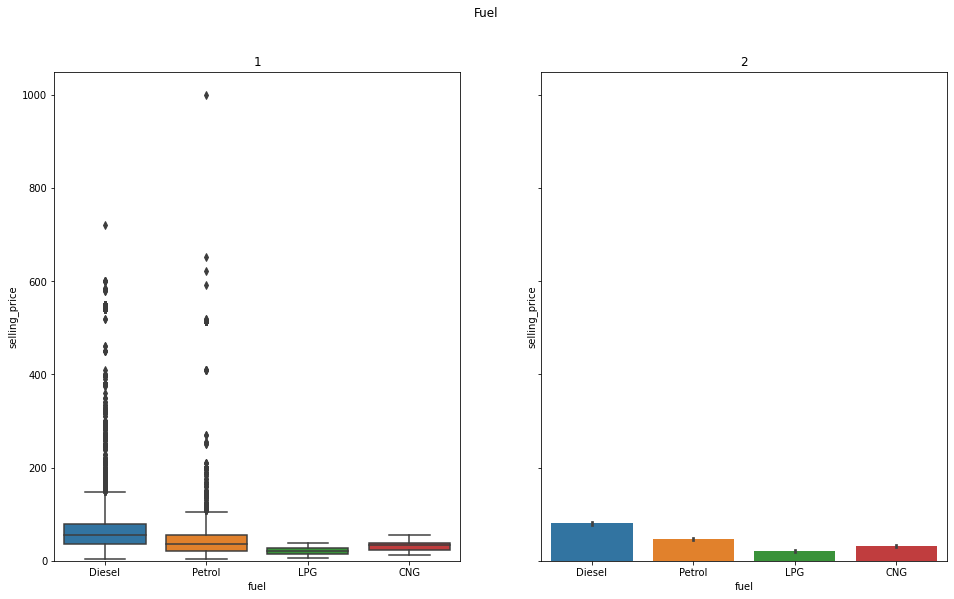

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(16, 9), sharey=True)
fig.suptitle('Fuel')

# Bulbasaur
sns.boxplot(ax=axes[0], x='fuel',y='selling_price',data=df)
axes[0].set_title('1')

# Charmander
sns.barplot(ax=axes[1], x='fuel', y='selling_price',data=df)
axes[1].set_title('2')

plt.show()

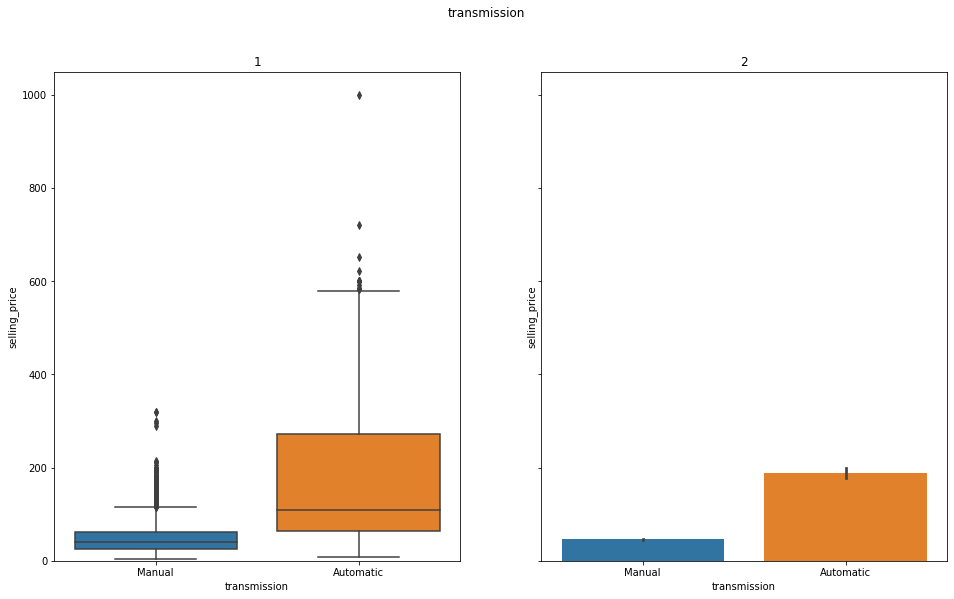

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(16, 9), sharey=True)
fig.suptitle('transmission')

# Bulbasaur
sns.boxplot(ax=axes[0], x='transmission',y='selling_price',data=df)
axes[0].set_title('1')

# Charmander
sns.barplot(ax=axes[1], x='transmission', y='selling_price',data=df)
axes[1].set_title('2')

plt.show()

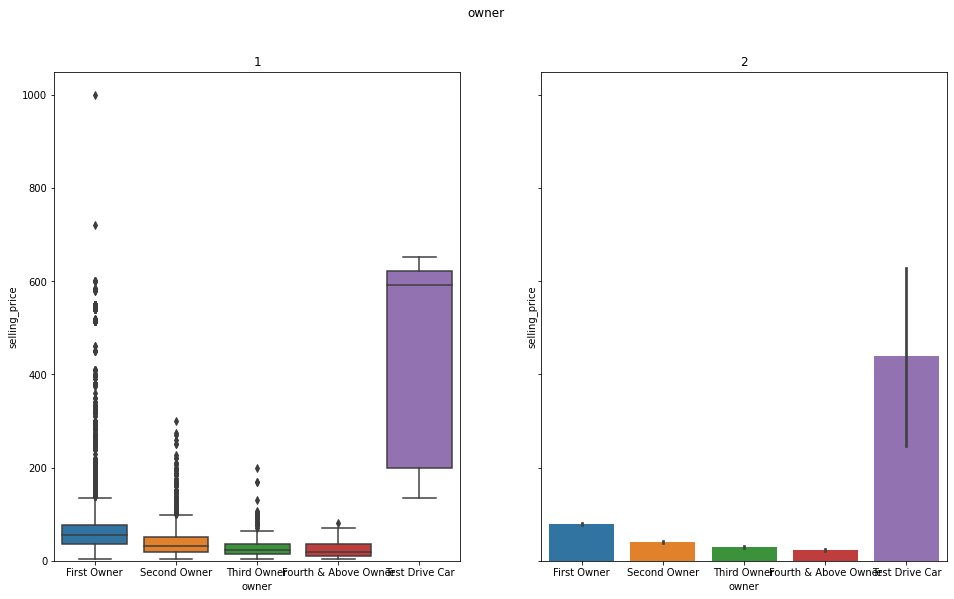

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(16, 9), sharey=True)
fig.suptitle('owner')

# Bulbasaur
sns.boxplot(ax=axes[0], x='owner',y='selling_price',data=df)
axes[0].set_title('1')

# Charmander
sns.barplot(ax=axes[1], x='owner', y='selling_price',data=df)
axes[1].set_title('2')

plt.show()

## Mileage Column has 0 in it

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


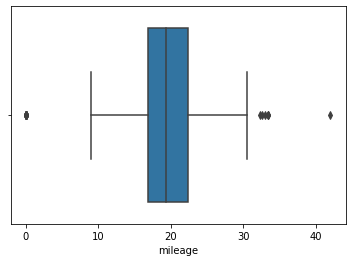

In [18]:
sns.boxplot(df['mileage'])
plt.show()
#As we can see there are some values as zero

In [19]:
median_value = df['mileage'].median()
df['mileage'] = df['mileage'].replace(0.0,median_value)

# Checking Normaizlation

<AxesSubplot:>

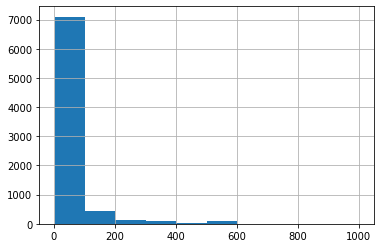

In [20]:
df['selling_price'].hist()

<AxesSubplot:>

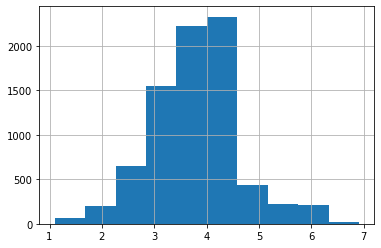

In [21]:
log_medv = np.log(df.selling_price)
log_medv.hist()

In [22]:
normaltest(log_medv)

NormaltestResult(statistic=246.95762441467772, pvalue=2.3650113340430068e-54)

In [23]:
X = df.drop(columns=['selling_price'])
y = df['selling_price']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [24]:
tnf = ColumnTransformer(
    [('ordinal',OrdinalEncoder(),['owner']),
    ('nominal',OneHotEncoder(drop='first',sparse=False),
     ['fuel','seller_type','transmission','Brand'])
    ], remainder='passthrough'
)

new_X_train = tnf.fit_transform(X_train)
new_X_test = tnf.transform(X_test)

In [25]:
print("---------------------------------------")
print("Shape of new X_train: ",new_X_train.shape)
print("---------------------------------------")
print("Shape of new X_test: ",new_X_test.shape)
print("---------------------------------------")
print("Shape of y_train: ",y_train.shape)
print("---------------------------------------")
print("Shape of y_test: ",y_test.shape)
print("---------------------------------------")

---------------------------------------
Shape of new X_train:  (6324, 43)
---------------------------------------
Shape of new X_test:  (1582, 43)
---------------------------------------
Shape of y_train:  (6324,)
---------------------------------------
Shape of y_test:  (1582,)
---------------------------------------


In [26]:
from catboost import CatBoostRegressor
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV

cat = CatBoostRegressor(iterations=500,
                             learning_rate=0.05,
                             depth=10,
                             eval_metric='RMSE',
                             random_seed = 42,
                             bagging_temperature = 0.2,
                             od_type='Iter',
                             metric_period = 50,
                             od_wait=20)

cat.fit(new_X_train, y_train, use_best_model=True)

You should provide test set for use best model. use_best_model parameter has been switched to false value.


0:	learn: 78.2330455	total: 70.1ms	remaining: 35s
50:	learn: 18.2586693	total: 612ms	remaining: 5.39s
100:	learn: 12.4561963	total: 1.14s	remaining: 4.49s
150:	learn: 10.7745585	total: 1.68s	remaining: 3.89s
200:	learn: 9.7212580	total: 2.58s	remaining: 3.83s
250:	learn: 8.8563427	total: 3.43s	remaining: 3.41s
300:	learn: 8.2666336	total: 3.99s	remaining: 2.64s
350:	learn: 7.8689681	total: 4.55s	remaining: 1.93s
400:	learn: 7.4467303	total: 5.1s	remaining: 1.26s
450:	learn: 7.1446340	total: 5.66s	remaining: 615ms
499:	learn: 6.8975803	total: 6.2s	remaining: 0us


In [27]:
pred_cat = cat.predict(new_X_test)

print('MAE:', metrics.mean_absolute_error(y_test, pred_cat))
print('MSE:', metrics.mean_squared_error(y_test, pred_cat))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_cat)))
print('R2_score: ', metrics.r2_score(y_test, pred_cat))

MAE: 6.9180628989746245
MSE: 158.11703157947161
RMSE: 12.574459494525863
R2_score:  0.9755389658801022
